### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key=""

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('HDFC.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,0.595425,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,0.594426,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,0.596424,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,0.592428,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,0.591429,189000.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6033,2020-06-10,990.0,999.849976,978.200012,991.849976,991.849976,18248865.0
6034,2020-06-11,985.0,988.400024,965.000000,968.599976,968.599976,15448857.0
6035,2020-06-12,928.0,986.650024,928.000000,982.750000,982.750000,21322438.0
6036,2020-06-15,968.0,974.000000,943.000000,949.849976,949.849976,16004968.0
6037,2020-06-16,975.0,993.950012,952.000000,990.400024,990.400024,22699985.0


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0         2.980000
1         2.975000
2         2.985000
3         2.965000
4         2.960000
           ...    
6033    991.849976
6034    968.599976
6035    982.750000
6036    949.849976
6037    990.400024
Name: Close, Length: 6038, dtype: float64

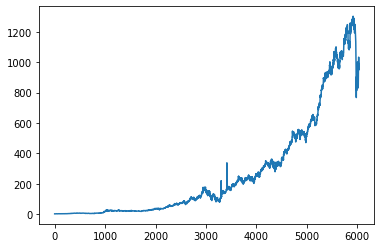

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0         2.980000
1         2.975000
2         2.985000
3         2.965000
4         2.960000
           ...    
6033    991.849976
6034    968.599976
6035    982.750000
6036    949.849976
6037    990.400024
Name: Close, Length: 6038, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[4.19242049e-04]
 [4.15395791e-04]
 [4.23088306e-04]
 ...
 [7.54108751e-01]
 [7.28800359e-01]
 [7.59993543e-01]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(3924, 2114)

In [ ]:
train_data

array([[0.00041924],
       [0.0004154 ],
       [0.00042309],
       ...,
       [0.18393957],
       [0.18345878],
       [0.1839011 ]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(3823, 100)
(3823,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(2013, 100)
(2013,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 12s 201ms/step - loss: 3.5125e-04 - val_loss: 0.0047
Epoch 2/100
60/60 [==============================] - 11s 190ms/step - loss: 2.8641e-05 - val_loss: 0.0075
Epoch 3/100
60/60 [==============================] - 11s 188ms/step - loss: 2.6082e-05 - val_loss: 0.0071
Epoch 4/100
60/60 [==============================] - 12s 195ms/step - loss: 2.5897e-05 - val_loss: 0.0076
Epoch 5/100
60/60 [==============================] - 11s 191ms/step - loss: 2.5659e-05 - val_loss: 0.0045
Epoch 6/100
60/60 [==============================] - 11s 188ms/step - loss: 2.6252e-05 - val_loss: 0.0067
Epoch 7/100
60/60 [==============================] - 11s 189ms/step - loss: 2.5572e-05 - val_loss: 0.0060
Epoch 8/100
60/60 [==============================] - 12s 193ms/step - loss: 2.4078e-05 - val_loss: 0.0038
Epoch 9/100
60/60 [==============================] - 12s 192ms/step - loss: 2.3327e-05 - val_loss: 0.0051
Epoch 10/100
60/60 [==========================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

96.36943868615585

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

696.0024866145086

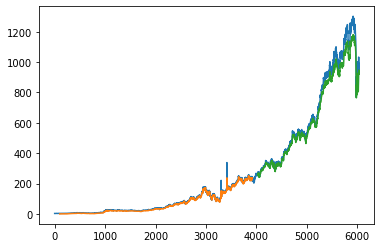

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

2114

In [ ]:
x_input=test_data[1993:].reshape(1,-1)
x_input.shape


(1, 121)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.9922689858461914,
 0.9895381992985065,
 0.9956152104904631,
 1.0,
 0.9898074180801959,
 0.9754223595172664,
 0.9789224913792757,
 0.9844226578206768,
 0.9766916436668682,
 0.9816917781935646,
 0.9879611961006113,
 0.97384545016805,
 0.9527294412807217,
 0.967845251811944,
 0.9653067781306706,
 0.9761532045649868,
 0.9848456899714249,
 0.9873842575013771,
 0.9900766376311366,
 0.9860380674364974,
 0.9886535408817275,
 0.9813456519580944,
 0.9634605553818346,
 0.9553449154952032,
 0.9526525353654437,
 0.955729541228026,
 0.9554988219436893,
 0.9313827131090566,
 0.9390752277655124,
 0.9488062780372157,
 0.9412676698292459,
 0.9414599826956573,
 0.9156900585965302,
 0.9441523628254169,
 0.9555757278589673,
 0.9518448774818727,
 0.9536910056127786,
 0.9522295032146956,
 0.9524602224990323,
 0.9589219532724904,
 0.9530756605956191,
 0.9361136288540636,
 0.9344213125537136,
 0.9314212133756606,
 0.9421522336280949,
 0.934382813056361,
 0.9288826458457085,
 0.9214594445888721,
 0.920651692

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.9895382  0.99561521 1.         0.98980742 0.97542236 0.97892249
 0.98442266 0.97669164 0.98169178 0.9879612  0.97384545 0.95272944
 0.96784525 0.96530678 0.9761532  0.98484569 0.98738426 0.99007664
 0.98603807 0.98865354 0.98134565 0.96346056 0.95534492 0.95265254
 0.95572954 0.95549882 0.93138271 0.93907523 0.94880628 0.94126767
 0.94145998 0.91569006 0.94415236 0.95557573 0.95184488 0.95369101
 0.9522295  0.95246022 0.95892195 0.95307566 0.93611363 0.93442131
 0.93142121 0.94215223 0.93438281 0.92888265 0.92145944 0.92065169
 0.92080551 0.90403588 0.90553588 0.90722829 0.8818814  0.88380453
 0.87115038 0.84991906 0.85491919 0.78376339 0.82107213 0.76699371
 0.74822396 0.6726835  0.68703001 0.67726051 0.59164283 0.58868123
 0.65718307 0.69129935 0.69387637 0.63787487 0.66114473 0.63633637
 0.62418216 0.68745309 0.68191452 0.70972293 0.68687615 0.66222165
 0.67487585 0.69837647 0.7249541  0.7071075  0.71245377 0.73272357
 0.7197232  0.71329997 0.71460771 0.74976246 0.768

In [ ]:
day_new=np.arange(1,121)
day_pred=np.arange(121,151)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6038

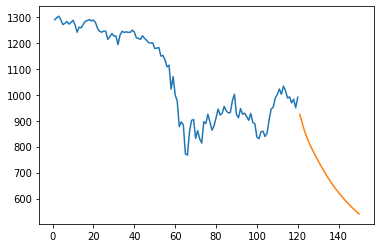

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5918:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3700:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)